In [4]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('weather.csv')

# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['weather'] = encoder.fit_transform(df['weather'])
print(df)


            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7        0
1     2012-01-02           10.9      10.6       2.8   4.5        2
2     2012-01-03            0.8      11.7       7.2   2.3        2
3     2012-01-04           20.3      12.2       5.6   4.7        2
4     2012-01-05            1.3       8.9       2.8   6.1        2
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9        2
1457  2015-12-28            1.5       5.0       1.7   1.3        2
1458  2015-12-29            0.0       7.2       0.6   2.6        1
1459  2015-12-30            0.0       5.6      -1.0   3.4        4
1460  2015-12-31            0.0       5.6      -2.1   3.5        4

[1461 rows x 6 columns]


In [6]:
from sklearn.model_selection import train_test_split

# Features (excluding 'date' and 'weather')
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]

# Target (weather)
y = df['weather']

# Splitting the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (1168, 4) (1168,)
Test set: (293, 4) (293,)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Read the data from the CSV file
df = pd.read_csv('weather.csv')

# Check for missing values
missing_data = df.isnull().sum()
print("Missing data:", missing_data)

# Encoding the 'weather' column
encoder = LabelEncoder()
df['weather'] = encoder.fit_transform(df['weather'])

# Features (excluding 'date' and 'weather')
X = df.drop(columns=['date', 'weather'])

# Target (weather)
y = df['weather']

# Splitting the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Missing data: date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
Training set: (1168, 4) (1168,)
Test set: (293, 4) (293,)


'date': This column likely contains the date of the weather observation. While it might contain valuable information for time-series analysis, in the context of a general predictive model, it's often treated as an identifier rather than a feature.

'weather': This column represents the weather condition (e.g., 'rain', 'drizzle'), which is the target variable in this context. It's what you're trying to predict, so it's excluded from the features and treated separately as the target variable y.

Feature Importance Scores: {'precipitation': 0.5230394658856935, 'temp_max': 0.18766386172188418, 'temp_min': 0.14722037138176128, 'wind': 0.14207630101066107}


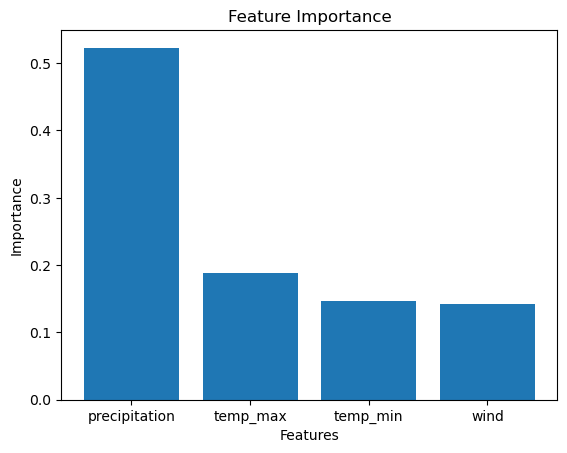

Best Five Features: ['precipitation', 'temp_max', 'temp_min', 'wind']


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('weather.csv')

# Encoding the 'weather' column
encoder = LabelEncoder()
df['weather'] = encoder.fit_transform(df['weather'])

# Features (excluding 'date' and 'weather')
X = df.drop(columns=['date', 'weather'])

# Target (weather)
y = df['weather']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Display feature importance scores
feature_importance_dict = {name: score for name, score in zip(X.columns, importances)}
print("Feature Importance Scores:", feature_importance_dict)

# Plot feature importance
plt.bar(X.columns, importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Select the best five features
best_five_features = sorted(feature_importance_dict, key=feature_importance_dict.get, reverse=True)[:5]
print("Best Five Features:", best_five_features)


<H1>Information Gain</h1>

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier with 'entropy' criterion
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

# Information Gain
information_gain = tree_model.feature_importances_
for feature, gain in zip(X.columns, information_gain):
    print(f"Feature: {feature}, Information Gain: {gain}")



Feature: precipitation, Information Gain: 0.5418990104157579
Feature: temp_max, Information Gain: 0.16110903022388373
Feature: temp_min, Information Gain: 0.16876865690489357
Feature: wind, Information Gain: 0.1282233024554649


<h1> GINI Index</h1>

In [12]:
# Create a Decision Tree Classifier with 'gini' criterion
tree_model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_model_gini.fit(X_train, y_train)

# Gini Index
gini_index = tree_model_gini.feature_importances_
for feature, gini in zip(X.columns, gini_index):
    print(f"Feature: {feature}, Gini Index: {gini}")


Feature: precipitation, Gini Index: 0.5981030423195735
Feature: temp_max, Gini Index: 0.13082168221230572
Feature: temp_min, Gini Index: 0.15415704095758048
Feature: wind, Gini Index: 0.11691823451054048


<h1>CHI Square</h1>


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute Chi-Square scores
chi2_scores, _ = chi2(X_train_scaled, y_train)
for feature, chi in zip(X.columns, chi2_scores):
    print(f"Feature: {feature}, Chi-Square Score: {chi}")


Feature: precipitation, Chi-Square Score: 76.11750757052067
Feature: temp_max, Chi-Square Score: 17.91067297391164
Feature: temp_min, Chi-Square Score: 4.965297157780935
Feature: wind, Chi-Square Score: 8.933721900251383


<h1>Pearson Correlation</h1>

In [16]:
# Pearson's Correlation Matrix
pearson_corr = X.corr()
print("Pearson's Correlation Matrix:\n", pearson_corr)


Pearson's Correlation Matrix:
                precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000
